In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
%matplotlib inline
sns.set(style="whitegrid")


In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])


Saving sales_data.csv to sales_data.csv


In [3]:
# Shape of data
print("Dataset Shape:", df.shape)

# Data info
df.info()

# Check missing values
df.isnull().sum()

# Statistical summary
df.describe(include='all').T


Dataset Shape: (10, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    10 non-null     int64 
 1   date        10 non-null     object
 2   product     10 non-null     object
 3   quantity    10 non-null     int64 
 4   unit_price  10 non-null     int64 
 5   region      10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,10.0,NaN,NaN,NaN,1004.0,2.44949,1001.0,1002.25,1003.5,1005.75,1008.0
date,10,8,2024-01-05,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,10,5,Laptop,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,10.0,NaN,NaN,NaN,1.4,0.699206,1.0,1.0,1.0,1.75,3.0
unit_price,10.0,NaN,NaN,NaN,19850.0,25339.966237,500.0,1500.0,7000.0,44375.0,57000.0
region,10,5,Hyderabad,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df.columns


Index(['order_id', 'date', 'product', 'quantity', 'unit_price', 'region'], dtype='object')

In [5]:
# Use correct date column name
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [6]:
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')


In [7]:
df = df.dropna(subset=['date', 'quantity', 'unit_price'])


In [8]:
df['revenue'] = df['quantity'] * df['unit_price']


In [9]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_name'] = df['date'].dt.month_name()


In [10]:
# Total Revenue
total_revenue = df['revenue'].sum()

# Number of Orders
orders = df['order_id'].nunique()

# Average Order Value
aov = total_revenue / orders

print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Total Orders: {orders}")
print(f"Average Order Value (AOV): ₹{aov:,.2f}")


Total Revenue: ₹201,500.00
Total Orders: 8
Average Order Value (AOV): ₹25,187.50


In [11]:
top_products = (
    df.groupby('product')
      ['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_products


,revenue
product,
Laptop,168000
Monitor,24500
Keyboard,4500
Mouse,2500
Headphones,2000


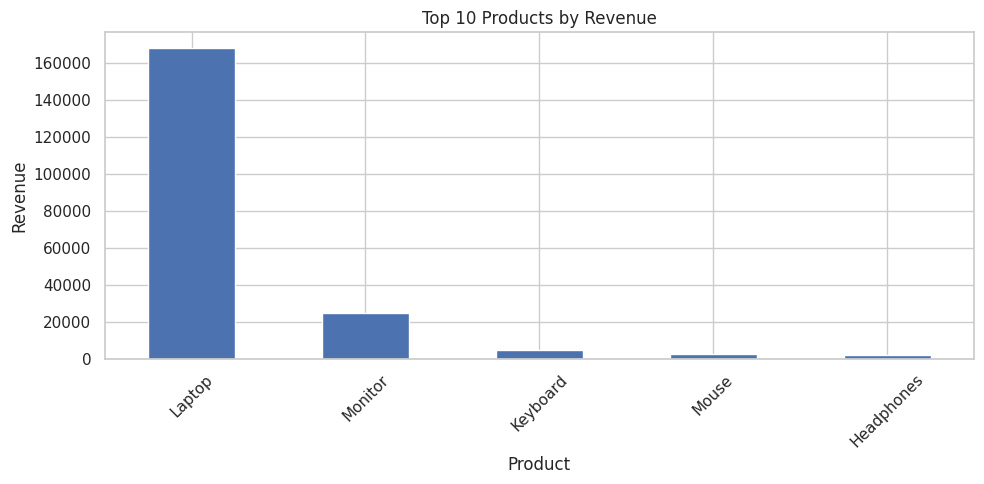

In [12]:
plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
top_regions = (
    df.groupby('region')
      ['revenue']
      .sum()
      .sort_values(ascending=False)
)

top_regions.head()


,revenue
region,
Bangalore,58500
Chennai,58000
Hyderabad,57500
Mumbai,15000
Delhi,12500


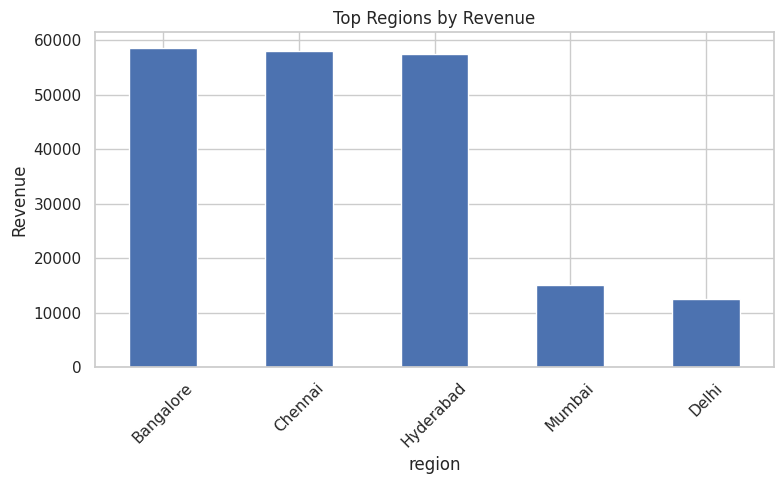

In [14]:
plt.figure(figsize=(8,5))
top_regions.head(10).plot(kind='bar')
plt.title('Top Regions by Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
df.set_index('date', inplace=True)

monthly_sales = df['revenue'].resample('M').sum()


/tmp/ipython-input-2451749938.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['revenue'].resample('M').sum()


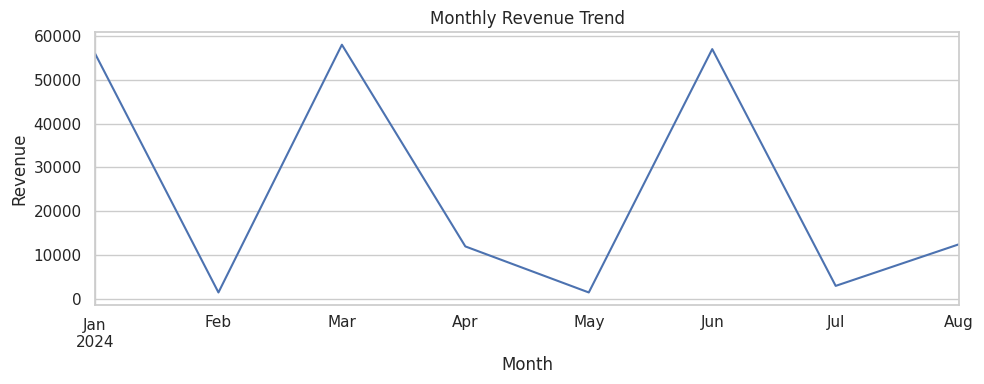

In [16]:
plt.figure(figsize=(10,4))
monthly_sales.plot()
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


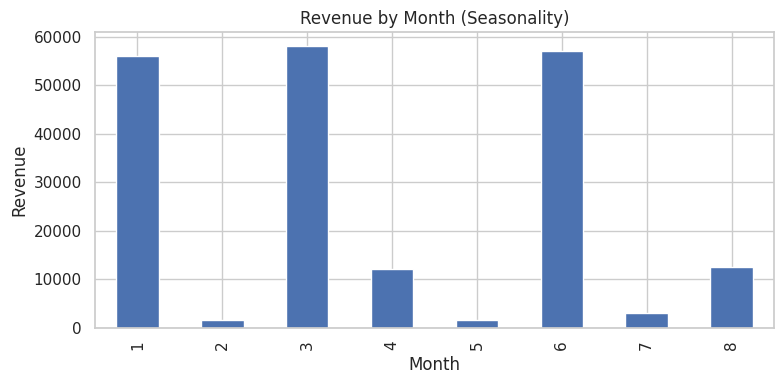

In [17]:
seasonality = df.groupby(df.index.month)['revenue'].sum()

plt.figure(figsize=(8,4))
seasonality.plot(kind='bar')
plt.title('Revenue by Month (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


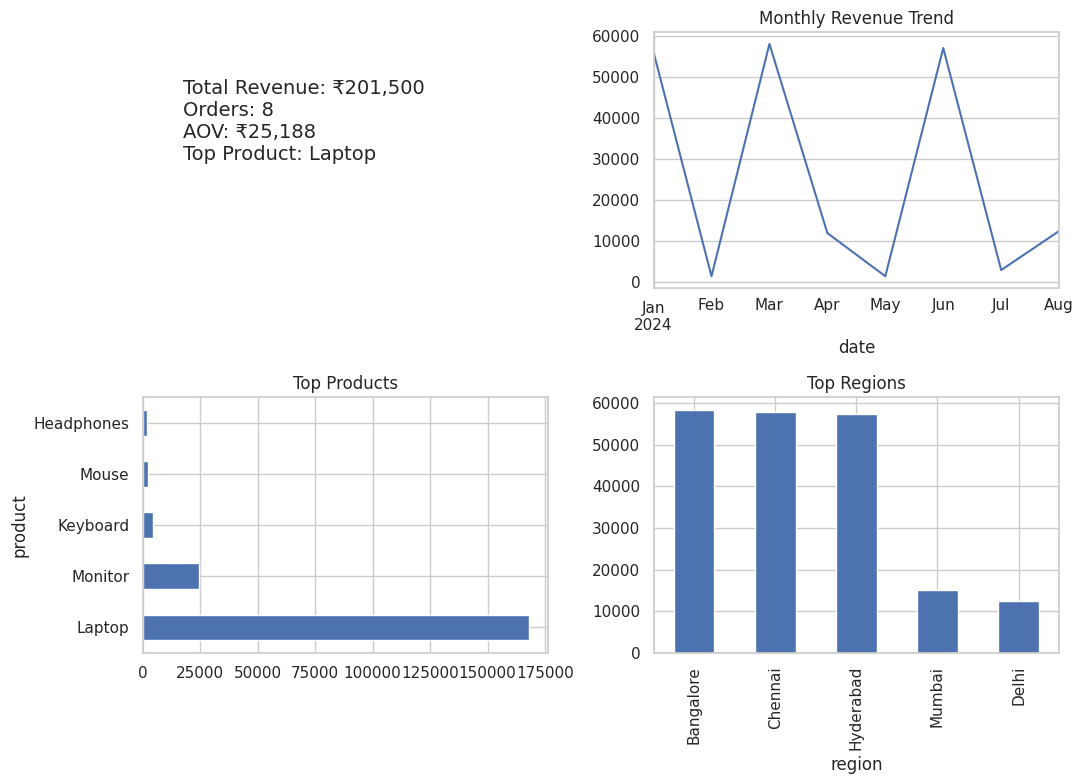

In [18]:
plt.figure(figsize=(11,8))

# KPIs
plt.subplot(2,2,1)
plt.axis('off')
kpi_text = (
    f"Total Revenue: ₹{total_revenue:,.0f}\n"
    f"Orders: {orders}\n"
    f"AOV: ₹{aov:,.0f}\n"
    f"Top Product: {top_products.index[0]}"
)
plt.text(0.1, 0.5, kpi_text, fontsize=14)

# Monthly Trend
plt.subplot(2,2,2)
monthly_sales.plot()
plt.title('Monthly Revenue Trend')

# Top Products
plt.subplot(2,2,3)
top_products.plot(kind='barh')
plt.title('Top Products')

# Regions
plt.subplot(2,2,4)
top_regions.head(5).plot(kind='bar')
plt.title('Top Regions')

plt.tight_layout()
plt.savefig('one_page_summary.png', dpi=200)
plt.show()


In [20]:
df.reset_index().to_csv('cleaned_sales_data.csv', index=False)
